In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv(r'C:\Users\Adeel\Desktop\Deep Learning\Deep_learning\bbc-news-data.csv', sep='\t')
data.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [5]:
data['content']

0        Quarterly profits at US media giant TimeWarne...
1        The dollar has hit its highest level against ...
2        The owners of embattled Russian oil giant Yuk...
3        British Airways has blamed high fuel prices f...
4        Shares in UK drinks and food firm Allied Dome...
                              ...                        
2220     BT is introducing two initiatives to help bea...
2221     Computer users across the world continue to i...
2222     A new European directive could put software w...
2223     The man making sure US computer networks are ...
2224     Online role playing games are time-consuming,...
Name: content, Length: 2225, dtype: object

In [6]:
data['category']

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: category, Length: 2225, dtype: object

In [7]:
# Preprocess the data
data['content'] = data['content'].str.lower().str.replace('[^\w\s]', '')
X = data['content'].values
y = data['category'].values

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences
X = pad_sequences(X, maxlen=200)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))  # Explicit input_length
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.01))
model.add(LSTM(128))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  
model.build(input_shape=(None, 200))
model.summary()


c:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 200, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,547,626 (5.90 MB)

 Trainable params: 1,547,626 (5.90 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 465ms/step - accuracy: 0.2127 - loss: 1.7764 - val_accuracy: 0.2051 - val_loss: 1.6257
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 515ms/step - accuracy: 0.2750 - loss: 1.6082 - val_accuracy: 0.3764 - val_loss: 1.7506
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 673ms/step - accuracy: 0.3183 - loss: 1.6993 - val_accuracy: 0.2163 - val_loss: 1.5786
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 482ms/step - accuracy: 0.2951 - loss: 1.5736 - val_accuracy: 0.1629 - val_loss: 1.6608
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.2916 - loss: 1.5700 - val_accuracy: 0.2753 - val_loss: 1.5953
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 468ms/step - accuracy: 0.3554 - loss: 1.4898 - val_accuracy: 0.4972 - val_loss: 1.2307
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 530ms/step - accuracy: 0.6389 - loss: 0.9594 - val_accuracy: 0.6573 - val_loss: 0.8748
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 481ms/step - accuracy: 0.7487 - loss: 0.6483 - val_accu

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.7168 - loss: 0.8090
Test Accuracy: 0.714606761932373
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step


In [15]:
predicted_categories = label_encoder.inverse_transform(predicted_labels)

# Display some predictions
for i in range(5):
    print(f'Predicted: {predicted_categories[i]}, Actual: {label_encoder.inverse_transform([y_test[i]])[0]}')

Predicted: business, Actual: business
Predicted: business, Actual: business
Predicted: sport, Actual: sport
Predicted: business, Actual: business
Predicted: politics, Actual: politics


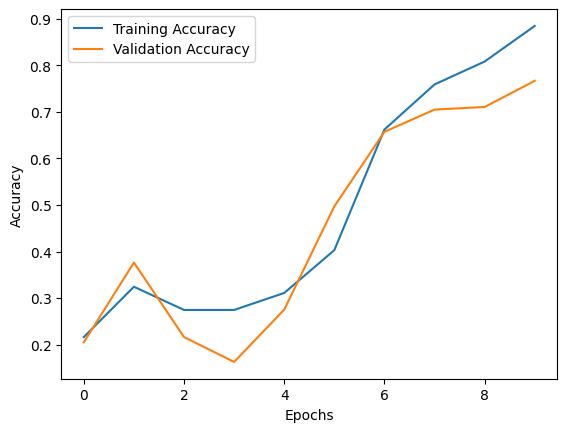

In [16]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

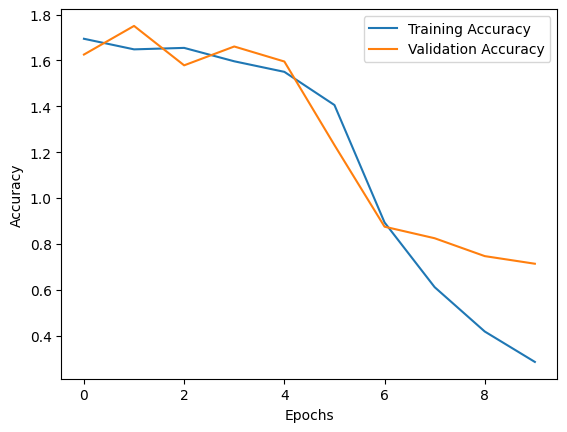

In [17]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()